In [6]:
import os

filepath = 'data/normalHip/JOR01/'
Pnr = filepath.find('JOR')
Patientnr = filepath[Pnr + len('JOR'):Pnr + len('JOR') + 2]
print('Patient Number:', Patientnr)

Patient Number: 01


In [7]:
import glob
image_files = glob.glob(os.path.join(filepath, '*.dcm'))
image_files.sort()
print('Number of Images =', len(image_files))
print('Image Files =', image_files[0])

Number of Images = 1038
Image Files = data/normalHip/JOR01/JOR01_3x_full.0001.dcm


In [8]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt


Im = []
Im_Roi = []

for k in range(1, len(image_files)):  # Adjust the range according to your needs
    ds = pydicom.dcmread(image_files[k - 1])
    im = ds.pixel_array  # Load pixel data
    Im.append(im)

    # In this particular dataset, the region of interest (ROI) is defined
    im_roi = im[550:1200, 50:700]

    Im.append(im)
    Im_Roi.append(im_roi)   

# Convert the list of NumPy arrays to a NumPy array
Im = np.array(Im)
Im_Roi = np.array(Im_Roi)

print('Shape of the NumPy array =', Im.shape)


Shape of the NumPy array = (2074, 1536, 1536)


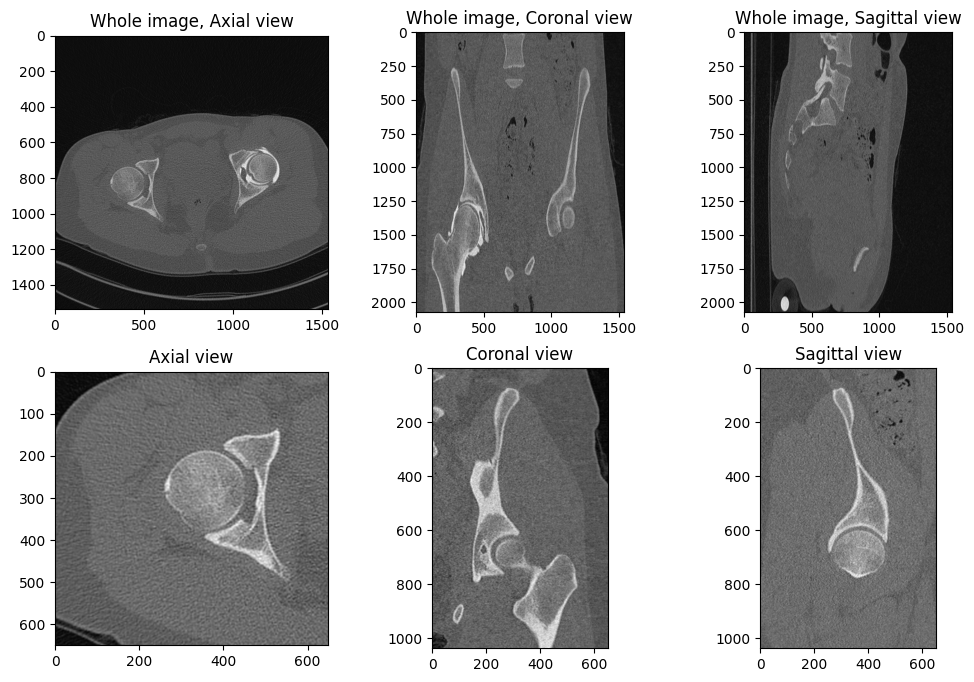

In [9]:
# Specify the slice number (sn) you want to visualize
sn = 357

# Generate the Coronal and Sagittal views
sagittal = np.rot90(np.rot90(Im[:, :, 750]))
sagittal_roi = np.rot90(np.rot90(Im_Roi[:, :, sn-1]))

coronal = np.rot90(np.rot90(Im[:, 750, :]))
coronal_roi = np.rot90(np.rot90(Im_Roi[:, sn - 1, :]))

# Load the axial view image
im = pydicom.dcmread(image_files[sn - 1]).pixel_array


# Create a figure with subplots to display all views
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(im, cmap='gray')
plt.title('Whole image, Axial view')

plt.subplot(2, 3, 2)
plt.imshow(coronal, cmap='gray')
plt.title('Whole image, Coronal view')

plt.subplot(2, 3, 3)
plt.imshow(sagittal, cmap='gray')
plt.title('Whole image, Sagittal view')

plt.subplot(2, 3, 4)
plt.imshow(Im_Roi[sn - 1, :, :], cmap='gray')
plt.title('Axial view')

plt.subplot(2, 3, 5)
plt.imshow(coronal_roi, cmap='gray')
plt.title('Coronal view')

plt.subplot(2, 3, 6)
plt.imshow(sagittal_roi, cmap='gray')
plt.title('Sagittal view')

plt.show()

# Locate the center of the femoral head

Task: Load the DysplasticHip and RetrovertedHip datasets and try to find the femoral head center.

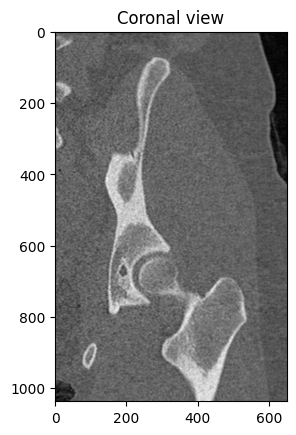

True

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#apply gaussian filter to reduce noise to coronal view
coronal = cv2.GaussianBlur(coronal_roi,(7,7),0.5)

# Normalize the image over 255 only positive

coronal = coronal - min(coronal.flatten())
coronal = coronal / max(coronal.flatten())
coronal = coronal * 255

plt.imshow(coronal, cmap='gray')
plt.title('Coronal view')
plt.show()

#save image
cv2.imwrite('Coronal.png', coronal)

In [20]:
#read image
cor = cv2.imread('Coronal.png',cv2.IMREAD_GRAYSCALE)

detected_image = cor.copy()

#make a 3 channel image grayscale

# Use Hough Transform to find the circle
circles = cv2.HoughCircles(detected_image, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30, minRadius=100, maxRadius=200)

detected_image = cv2.cvtColor(detected_image, cv2.COLOR_GRAY2BGR)

if circles is not None:
    circles = np.uint16(np.around(circles))

    for circle in circles[0, :]:
        # draw the outer circle
        cv2.circle(detected_image, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)
        # draw the center of the circle
        cv2.circle(detected_image, (circle[0], circle[1]), 2, (0, 255, 0), 3)

# Show the image
plt.imshow(detected_image)
plt.title('Coronal view with circle')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
# Find dark and bright circles using Hough transform
circlesDark = cv2.HoughCircles(testIm, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=80, minRadius=0, maxRadius=0)
circlesBright = cv2.HoughCircles(testIm, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=80, minRadius=0, maxRadius=0)

if circlesDark is not None:
    circlesDark = np.uint16(np.around(circlesDark))
if circlesBright is not None:
    circlesBright = np.uint16(np.around(circlesBright))

# Plot the axial view with detected circles
plt.figure(2)
plt.imshow(testIm, cmap='gray')
plt.title('Axial view')
plt.axis('off')

plt.figure(3)
plt.imshow(testIm, cmap='gray')
plt.title('Axial view')
plt.axis('off')

if circlesDark is not None:
    for circle in circlesDark[0, :]:
        # Draw the outer circle in blue
        cv2.circle(testIm, (circle[0], circle[1]), circle[2], (0, 0, 255), 2)
        # Draw the center in red
        cv2.circle(testIm, (circle[0], circle[1]), 2, (0, 0, 255), 3)

if circlesBright is not None:
    for circle in circlesBright[0, :]:
        # Draw the outer circle in blue
        cv2.circle(testIm, (circle[0], circle[1]), circle[2], (0, 0, 255), 2)
        # Draw the center in red
        cv2.circle(testIm, (circle[0], circle[1]), 2, (0, 0, 255), 3)

plt.show()

NameError: name 'testIm' is not defined